### Lotka-Volterra predator prey sim

Predator prey models have the form:

$ \frac{dx}{dt} = \alpha x - \beta xy $

$ \frac{dy}{dt} = \delta xy - \gamma y $

The the below code uses the matrix:

$ \left[ \begin{matrix} \alpha x - \beta xy & 0 \\ 0 & \delta xy - \gamma y \end{matrix} \right] $

And this reflects: 

$ \frac{dx}{dt} $ is proportional to $ \alpha x $

$ \frac{dy}{dt} $ is proportional to $ -\gamma y $

So given the current population of animals:

$ p = [x,y] $

Then the next moment is:

$ \left[ \begin{matrix} \alpha x - \beta xy & 0 \\ 0 & \delta xy - \gamma y \end{matrix} \right] $

$ \left[ \begin{matrix} \alpha - \beta y & 0 \\ 0 & \delta x - \gamma \end{matrix} \right] \left[ \begin{matrix} x \\ y \end{matrix} \right]$

The above line is how the code computes the next value of $ p $

In [54]:
close all;
clear all;

# I renamed y -> p for "populations" to avoid confusing myself

function dp = Lotka_Volterra_Model(t,p)
    # disp(t); disp("next t"); 
    # shows that ode45 always passes next individla t
    # disp(p); disp("next p");
    # shows that ode45 always passes next vector (current populations)
    alpha = 0.9;
    beta = 1;
    delta = 0.3;
    gamma = 0.2;
    A = [alpha - beta*p(2), 0; 0, delta*p(1) - gamma];
    dp = A*p;
end

t0 = 0;

tfinal = 300;

% We normalise the initial condition
p0 = [10; 1]; # prey, predeator

% Simulate the differential equation.
[t,p] = ode45(@Lotka_Volterra_Model,[t0, tfinal],p0);

The following plot shows the prey (blue) line grows, so the predators (red) catch up, the prey population collapses, so does the predator population, and the cycle repeats.

.

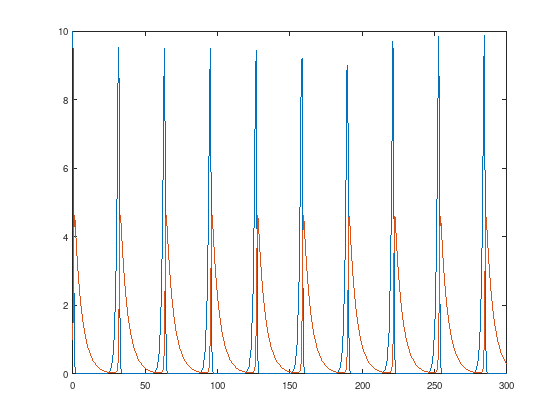

In [52]:
figure;

plot(t,p)

The following plot shows how the populations interact. It's the same situation as the previous plot but it's a phase plane. It shows as the prey grows so do the predators. As the predators grow then the prey shrink.

.

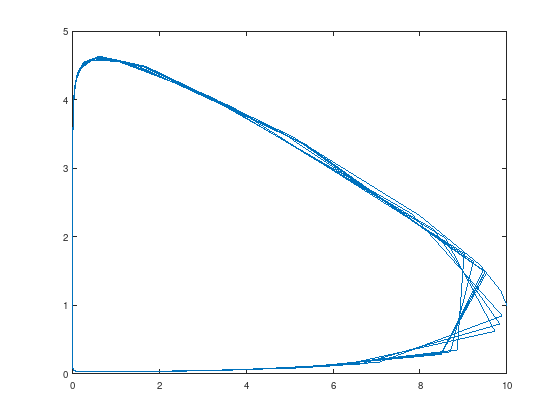

In [53]:
figure;

plot(p(:,1),p(:,2))